In [29]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.contrib import tzip

In [2]:
#path
DATA_PATH = "data/wikispeedia_paths-and-graph/"

In [3]:
paths_finished = pd.read_csv(DATA_PATH + "paths_finished.tsv", sep="\t", header = None, skiprows=15, names = [
    'hashedIpAddress',   'timestamp',   'durationInSec',   'path',   'rating',
  ])
paths_unfinished = pd.read_csv(DATA_PATH + "paths_unfinished.tsv", sep="\t", header = None, skiprows=16, names = [
    'hashedIpAddress',   'timestamp',   'durationInSec',   'path',   'target'   ,'type'
  ])
all_paths = pd.concat([paths_finished.iloc[:, :4], paths_unfinished.iloc[:, :4]], ignore_index=True)
all_paths.sort_values(by="timestamp", inplace=True)


In [4]:
all_paths["timestamp"] = [datetime.fromtimestamp(x).strftime("%m,%d,%Y,%I:%M:%S") for x in all_paths["timestamp"]]
all_paths["year"] = [x.split(",")[2] for x in all_paths["timestamp"]]
all_paths["month"] = [x.split(",")[0] for x in all_paths["timestamp"]]
all_paths["day"] = [x.split(",")[1] for x in all_paths["timestamp"]]
all_paths["hour"] = [x.split(",")[3] for x in all_paths["timestamp"]]
all_paths

,hashedIpAddress,timestamp,durationInSec,path,year,month,day,hour
15545,NaN,"08,18,2008,11:29:32",106,Tropical_Storm_Bonnie_%282004%29;Gulf_of_Mexic...,2008,08,18,11:29:32
13719,NaN,"08,18,2008,11:29:32",140,Tyrannosaurus;London;Temperate;Weather;Solar_S...,2008,08,18,11:29:32
10377,NaN,"08,18,2008,11:29:32",96,Heat;Latin;Europe;Italy,2008,08,18,11:29:32
4869,321e4b101c5b58ff,"08,19,2008,12:39:45",91,George_W._Bush;Jesus;Christianity;Roman_Cathol...,2008,08,19,12:39:45
2510,321e4b101c5b58ff,"08,19,2008,12:48:15",81,Brazil;Agriculture;Ethanol;Hydrogen;Chemical_e...,2008,08,19,12:48:15
...,...,...,...,...,...,...,...,...
20951,473d6ac602c2b198,"01,15,2014,10:35:29",35,Egyptian_pyramids;Archaeology;Agriculture;Milk,2014,01,15,10:35:29
11965,473d6ac602c2b198,"01,15,2014,10:35:45",9,Sudan;Seychelles,2014,01,15,10:35:45
35658,1cf0cbb3281049ab,"01,15,2014,10:46:45",79,Bird_of_prey;Eagle;United_States;Moon;Lunar_ec...,2014,01,15,10:46:45
76192,1cf0cbb3281049ab,"01,15,2014,10:54:01",352,Mark_Antony;Rome;Tennis;Hawk-Eye;Computer,2014,01,15,10:54:01


year
2008     2046
2009    18499
2010     6952
2011    13737
2012    17790
2013    16519
2014      650
dtype: int64


Text(0, 0.5, 'Number of paths')

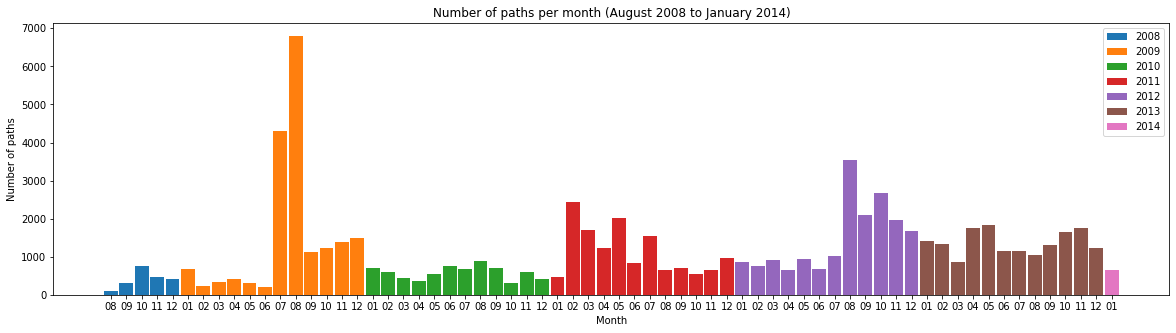

In [14]:
print(all_paths.groupby(["year"]).size())
freq_timestamp = all_paths.groupby(["year", "month"], as_index=False).size().reset_index()
fig, ax= plt.subplots(1, 1, figsize = (20, 5))
year_color = {"2008": 'lightcoral', "2009": 'lightsalmon', "2010": 'bisque', 
              "2011": 'palegreen', "2012": 'skyblue', "2013": 'lightpink', "2014": 'silver'}
start = 0
for year, color in year_color.items():
    value = freq_timestamp.loc[freq_timestamp["year"] == year]
    b = plt.bar(x = np.arange(start, start + len(value)), height = value["size"], width = 0.9)
    start = start + len(value)
ax.set_xticks(np.arange(66))
ax.set_xticklabels(freq_timestamp["month"])
year_color = {"2008": 'lightcoral', "2009": 'lightsalmon', "2010": 'bisque', 
              "2011": 'palegreen', "2012": 'skyblue', "2013": 'lightpink', "2014": 'silver'}
ax.legend(year_color.keys())
ax.set_title("Number of paths per month (August 2008 to January 2014)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of paths")

In [44]:
link_categories = pd.read_csv(DATA_PATH + "categories.tsv", sep="\t", header = None, skiprows=13, names = [
    'article',   'categories'
  ])
different_categories = link_categories["categories"].unique()
cat_dataframe = pd.DataFrame(0, index=all_paths.index, columns=different_categories)
#all_paths_cat = pd.concat([all_paths, cat_dataframe], axis = 1)
all_paths_cat

,subject.History.British_History.British_History_1500_and_before_including_Roman_Britain,subject.People.Historical_figures,subject.Countries,subject.Geography.European_Geography.European_Countries,subject.People.Artists,subject.Business_Studies.Currency,subject.History.General_history,subject.History.Military_History_and_War,subject.Science.Physics.Space_Astronomy,subject.Everyday_life.Sports_events,...,subject.History.British_History,subject.IT.Cryptography,subject.Citizenship.Law,subject.History.North_American_History,subject.Citizenship.Culture_and_Diversity,subject.Citizenship.Education,subject.Science.Biology.Evolution_and_reproduction,subject.Science.Chemistry.Materials_science,subject.Science.Physics.The_Planets,subject.Art.Artists


In [42]:
for index, path in tzip(all_paths_cat.index, all_paths_cat["path"]):
    path_split = path.split(";")
    for link in path_split:
        if link != "<":
            link_row = link_categories.loc[link_categories["article"] == link]
            if link_row.shape[0] != 1:
                print("No categorie for article " + str(link))
            cat = link_row["categories"]
            # all_paths_cat.loc[index][cat] = all_paths_cat.loc[index][cat] + 1
        
    

  0%|          | 0/76193 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [57]:
link_categories.index = link_categories["article"]
link_categories.drop(columns="article")
link_categories

,article,categories
article,,
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
%C3%85land,%C3%85land,subject.Countries
%C3%85land,%C3%85land,subject.Geography.European_Geography.European_...
%C3%89douard_Manet,%C3%89douard_Manet,subject.People.Artists
...,...,...
Zirconium,Zirconium,subject.Science.Chemistry.Chemical_elements
Zoroaster,Zoroaster,subject.People.Religious_figures_and_leaders
Zuid-Gelders,Zuid-Gelders,subject.Geography.European_Geography
